In [146]:
pip install xgboost lightgbm catboost


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier



In [148]:
df = pd.read_csv('/content/data_csv.csv')

In [149]:
df.shape

(1985, 28)

In [150]:
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

<ipython-input-152-127305a37097>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dtype_counts, x="Data Type", y="Count", palette="Set2")


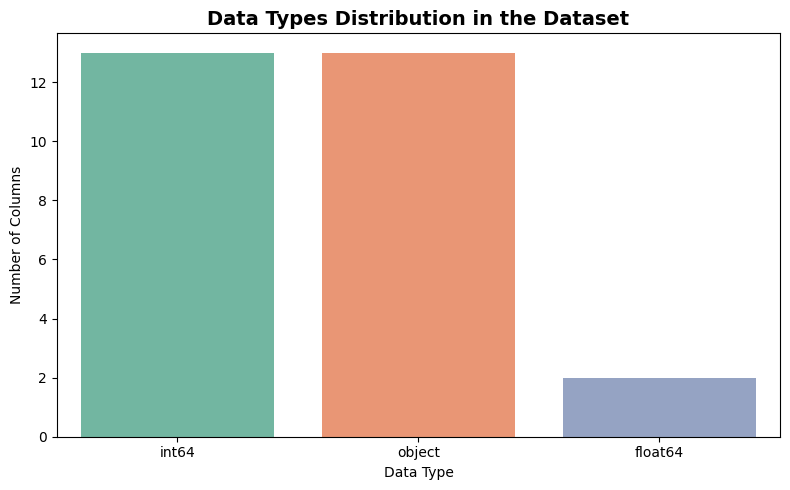

In [152]:
dtype_counts = df.dtypes.value_counts().rename_axis('Data Type').reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=dtype_counts, x="Data Type", y="Count", palette="Set2")
plt.title("Data Types Distribution in the Dataset", fontsize=14, fontweight='bold')
plt.ylabel("Number of Columns")
plt.xlabel("Data Type")
plt.tight_layout()
plt.show()

In [153]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [154]:
df = df.drop(columns=["CASE_NO_PATIENT'S"])

column it is removed is not important for prediction


In [155]:
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes


In [156]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Childhood Autism Rating Scale
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1976.000000,1985.000000,1946.000000,1985.000000
mean,0.299244,0.238287,0.213098,0.272040,0.278589,0.306297,0.345088,0.243829,0.259950,0.446348,3.074393,9.624685,4.234841,1.701763
std,0.458042,0.426143,0.409600,0.445123,0.448418,0.461071,0.475517,0.429499,0.438717,0.497238,3.680263,4.302416,2.898247,1.015367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,4.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,14.000000,6.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,18.000000,10.000000,4.000000


In [157]:
# taget class distribution
df["ASD_traits"].value_counts()

,count
ASD_traits,
Yes,1074
No,911


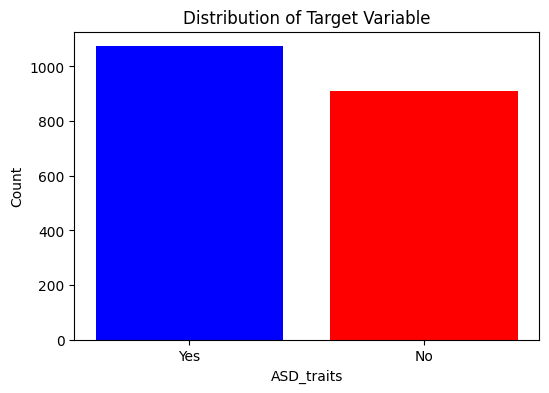

In [158]:
# Count occurrences
counts = df['ASD_traits'].value_counts()

# Create plot
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=['blue', 'red'])
plt.xlabel('ASD_traits')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [159]:
df['Ethnicity'].unique()

array(['middle eastern', 'White European', 'Middle Eastern', 'Hispanic',
       'Black', 'Asian', 'South Asian', 'Native Indian', 'Others',
       'black', 'asian', 'Latino', 'Mixed', 'south asian', 'mixed',
       'PaciFica'], dtype=object)

In [160]:
df['Ethnicity'] = df['Ethnicity'].str.lower().str.strip()


#Univariate Analysis

Mean: 9.624685138539043
Median: 9.0


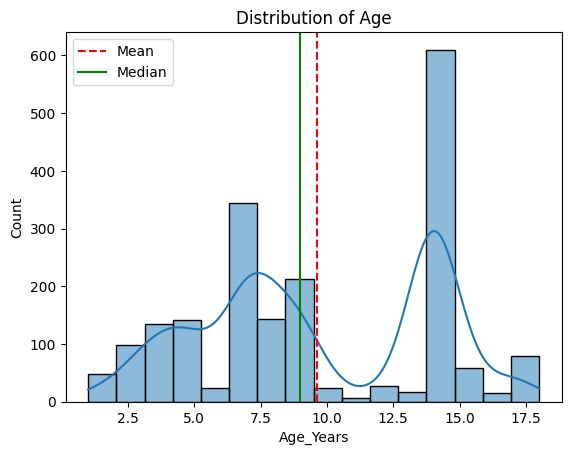

In [161]:
sns.histplot(df["Age_Years"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["Age_Years"].mean()
age_median = df["Age_Years"].median()

print("Mean:", age_mean)
print("Median:", age_median)


plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

The presence of two peaks (bimodal distribution) suggests that ASD assessments may be more common at early childhood and teenage years.

In [162]:
df['ASD_traits'] = df['ASD_traits'].map({'Yes': 1, 'No': 0})


Mean: 0.5410579345088161
Median: 1.0


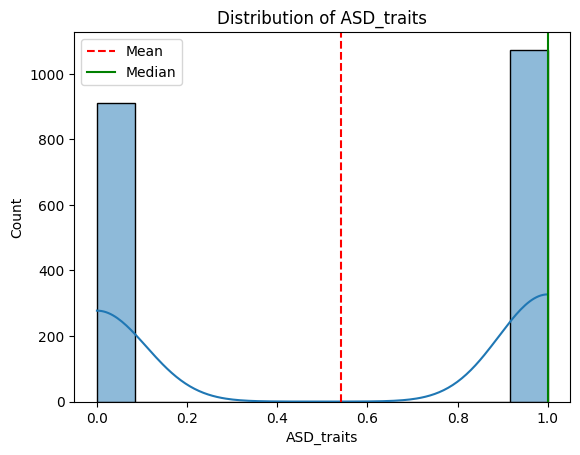

In [163]:


sns.histplot(df["ASD_traits"], kde=True)
plt.title("Distribution of ASD_traits")

# calculate mean and median
ASD_traits_mean = df["ASD_traits"].mean()
ASD_traits_median =df["ASD_traits"].median()

print("Mean:", ASD_traits_mean)
print("Median:", ASD_traits_median)



plt.axvline(ASD_traits_mean, color="red", linestyle="--", label="Mean")
plt.axvline(ASD_traits_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()


The median is aligned with the bar at 1, meaning more than 50% of individuals in the dataset have ASD traits.

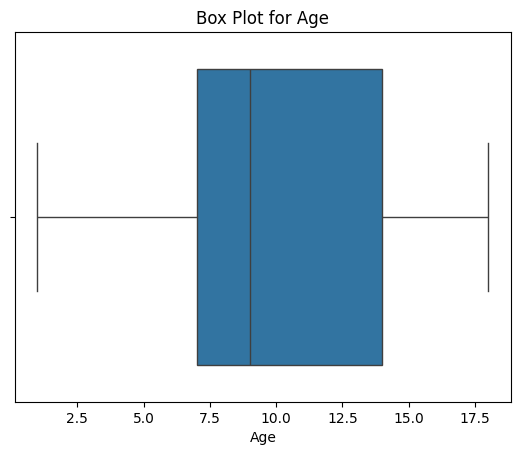

In [164]:
# box plot for the outliers

sns.boxplot(x=df["Age_Years"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

Age distribution is fairly spread out between 1 and 18 years.

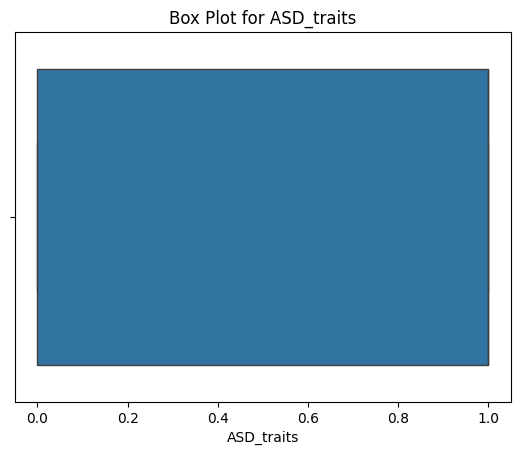

In [165]:
# box plot for asd traits
sns.boxplot(x=df["ASD_traits"])
plt.title("Box Plot for ASD_traits")
plt.xlabel("ASD_traits")
plt.show()

In [166]:
missing_values = df.isnull().sum()
print(missing_values)


A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                                             1
Global developmental delay/inte

In [167]:
# Handle missing values for numerical columns using the median
df.loc[:, 'Social_Responsiveness_Scale'] = df['Social_Responsiveness_Scale'].fillna(df['Social_Responsiveness_Scale'].median())
df.loc[:, 'Qchat_10_Score'] = df['Qchat_10_Score'].fillna(df['Qchat_10_Score'].median())

# Handle missing values for categorical columns using the mode
df.loc[:, 'Depression'] = df['Depression'].fillna(df['Depression'].mode()[0])
df.loc[:, 'Social/Behavioural Issues'] = df['Social/Behavioural Issues'].fillna(df['Social/Behavioural Issues'].mode()[0])


In [168]:
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation[['Social_Responsiveness_Scale', 'Qchat_10_Score', 'Depression', 'Social/Behavioural Issues']])

Social_Responsiveness_Scale    0
Qchat_10_Score                 0
Depression                     0
Social/Behavioural Issues      0
dtype: int64


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   A1                                                  1985 non-null   int64  
 1   A2                                                  1985 non-null   int64  
 2   A3                                                  1985 non-null   int64  
 3   A4                                                  1985 non-null   int64  
 4   A5                                                  1985 non-null   int64  
 5   A6                                                  1985 non-null   int64  
 6   A7                                                  1985 non-null   int64  
 7   A8                                                  1985 non-null   int64  
 8   A9                                                  1985 non-null   int64  
 9

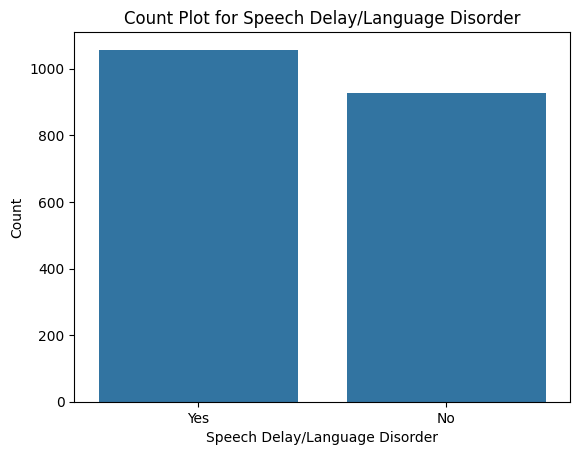

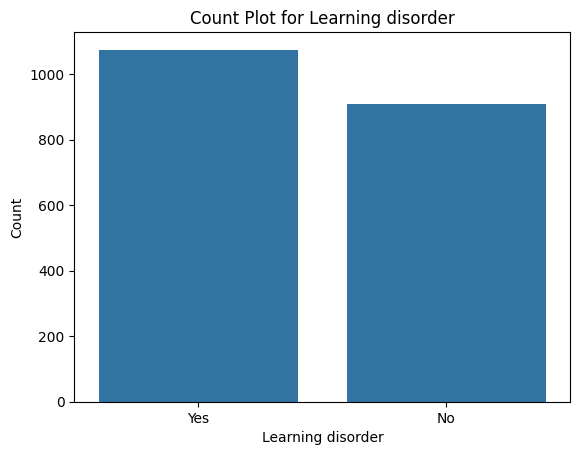

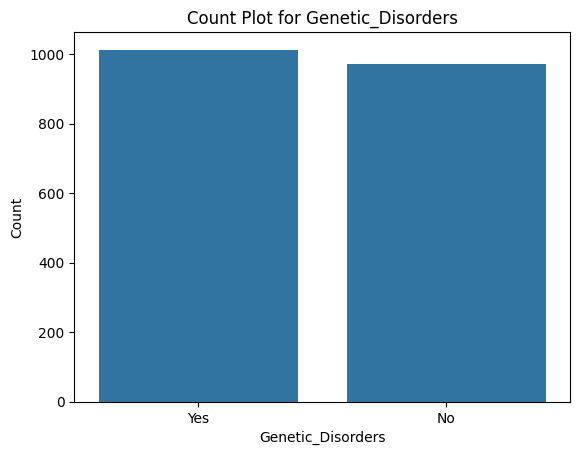

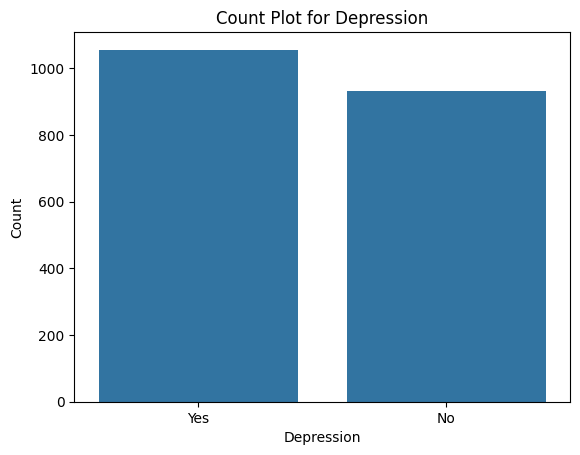

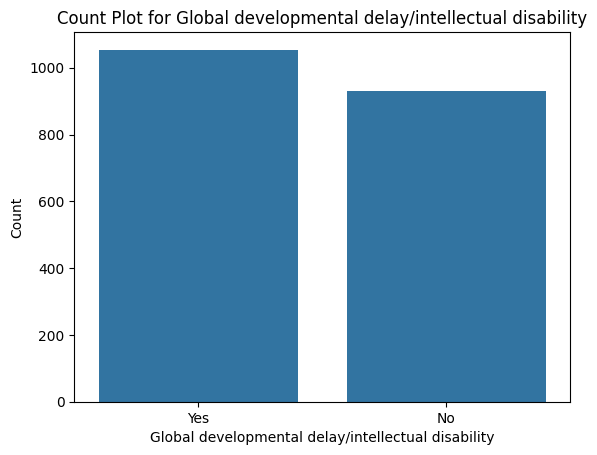

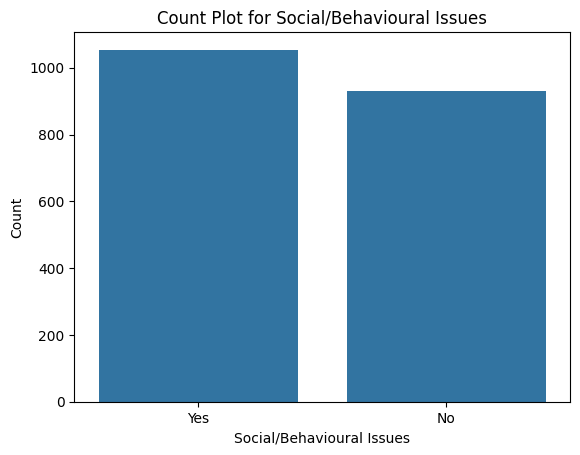

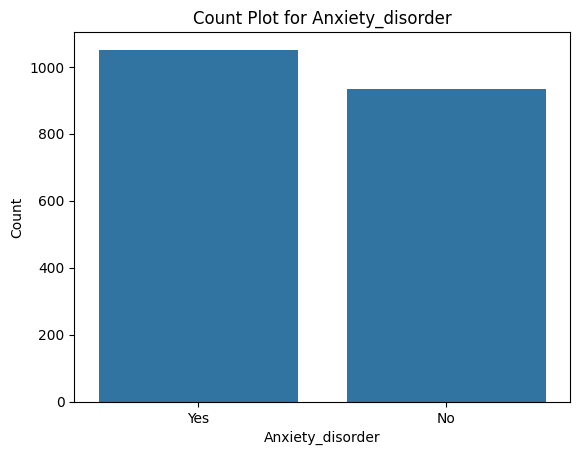

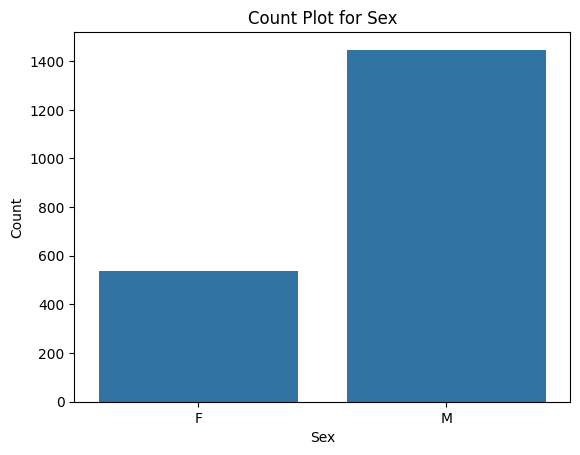

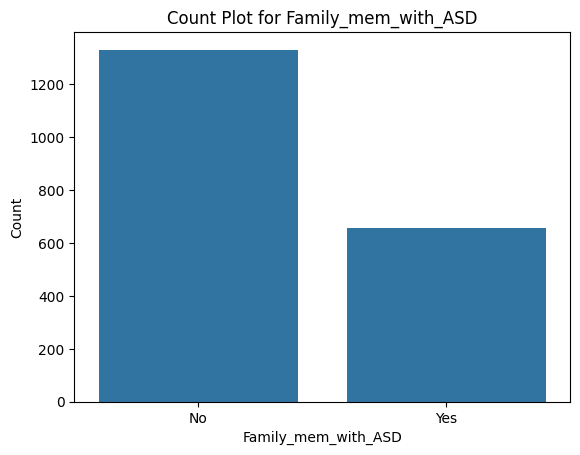

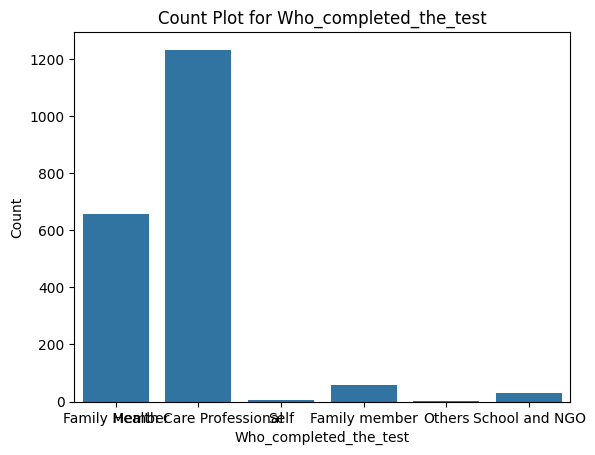

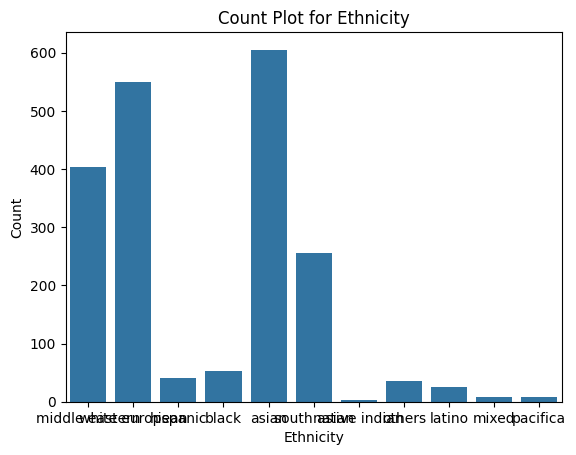

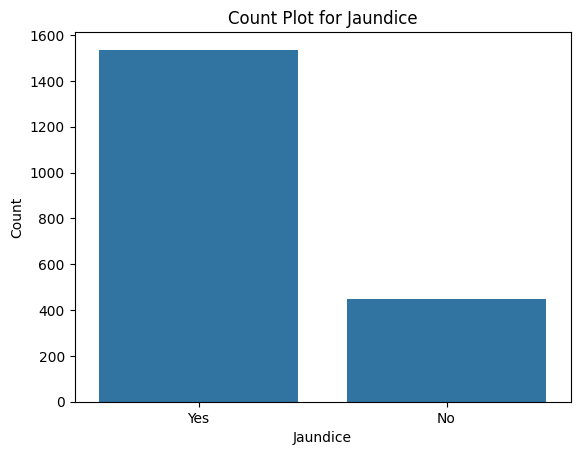

In [170]:
categorical_columns = ['Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues',
       'Anxiety_disorder', 'Sex', 'Family_mem_with_ASD', 'Who_completed_the_test',
       'Ethnicity', 'Jaundice']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

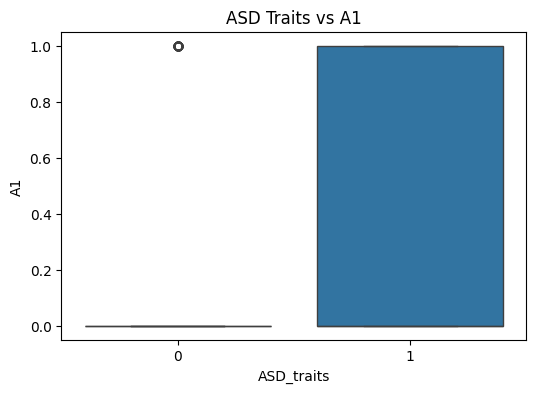

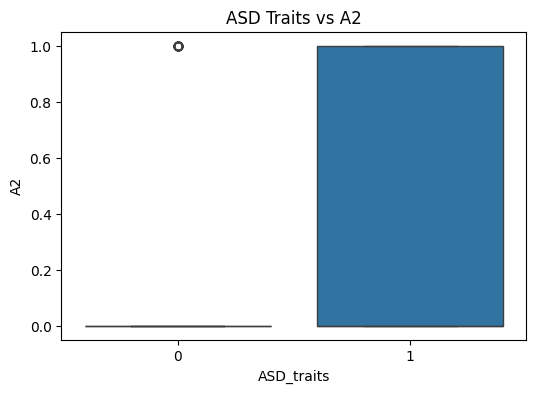

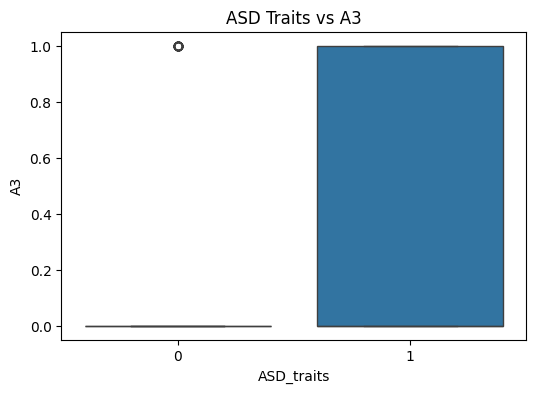

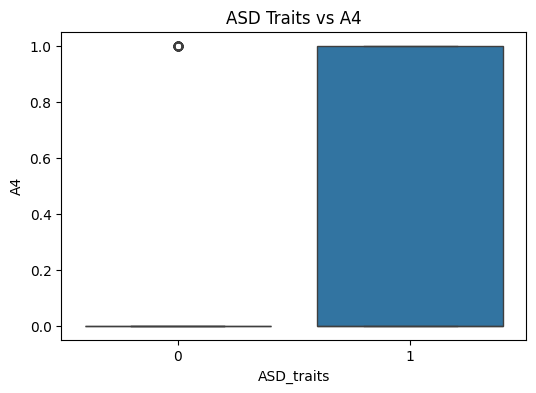

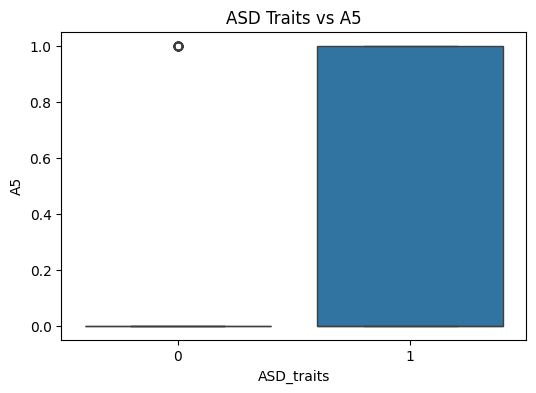

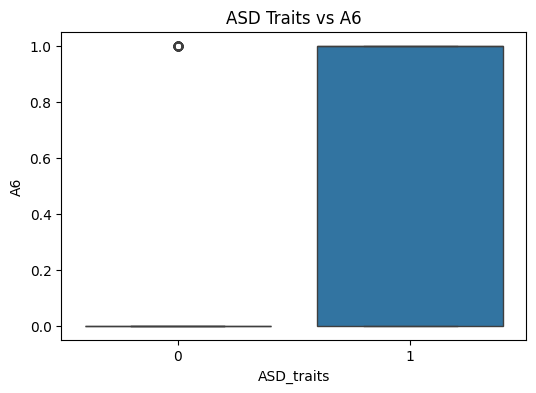

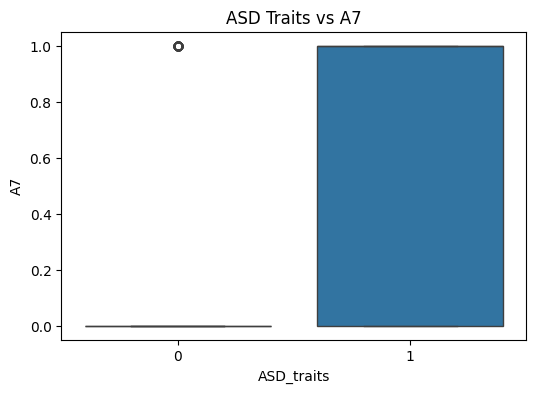

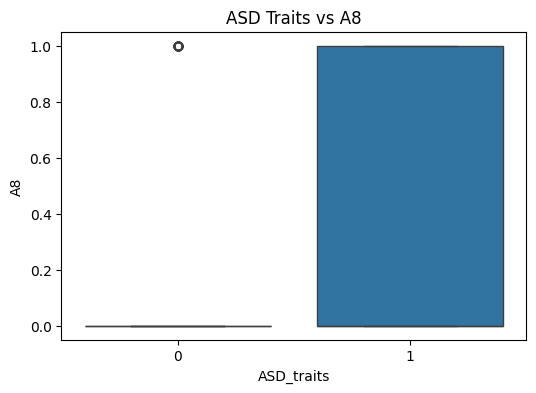

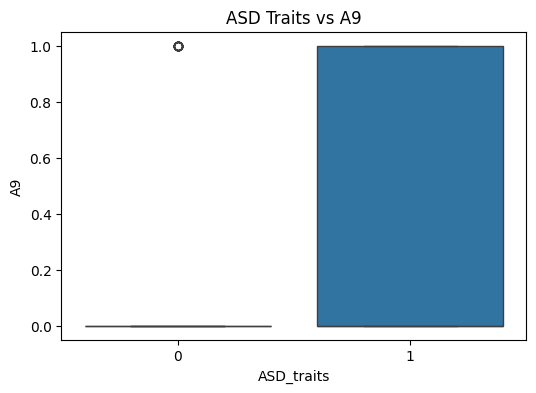

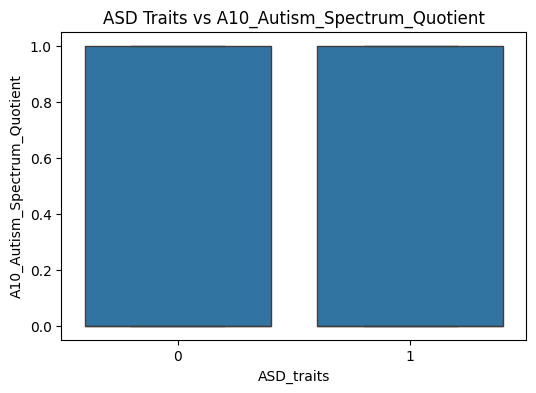

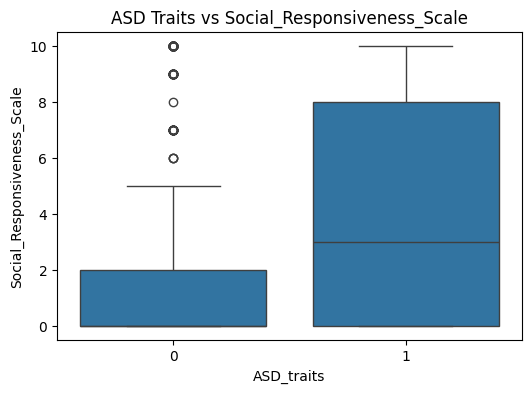

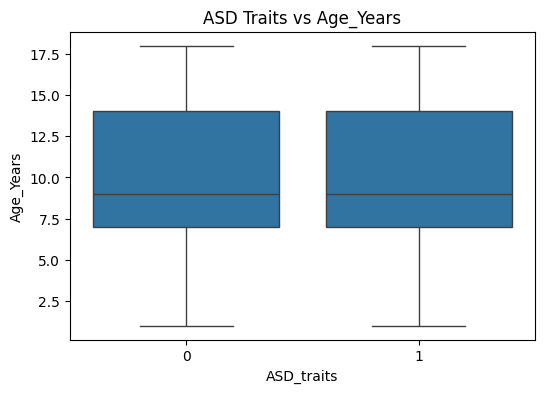

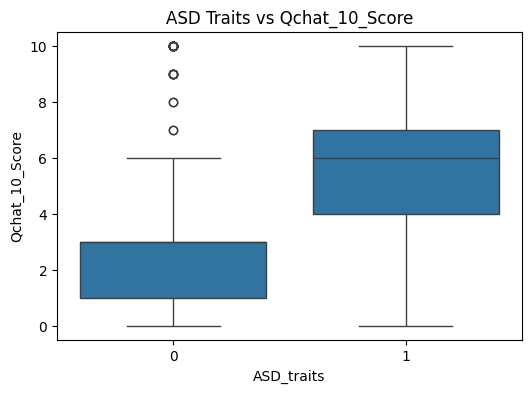

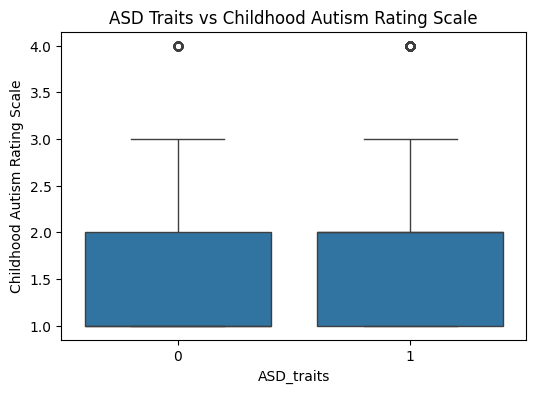

In [171]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'ASD_traits':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df['ASD_traits'], y=df[col])
        plt.title(f"ASD Traits vs {col}")
        plt.show()

In [172]:
object_columns = df.select_dtypes(include=["object"]).columns


In [173]:
print(object_columns)

Index(['Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Anxiety_disorder', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test'],
      dtype='object')


In [174]:
encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [175]:
encoders

{'Speech Delay/Language Disorder': LabelEncoder(),
 'Learning disorder': LabelEncoder(),
 'Genetic_Disorders': LabelEncoder(),
 'Depression': LabelEncoder(),
 'Global developmental delay/intellectual disability': LabelEncoder(),
 'Social/Behavioural Issues': LabelEncoder(),
 'Anxiety_disorder': LabelEncoder(),
 'Sex': LabelEncoder(),
 'Ethnicity': LabelEncoder(),
 'Jaundice': LabelEncoder(),
 'Family_mem_with_ASD': LabelEncoder(),
 'Who_completed_the_test': LabelEncoder()}

In [176]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,0,4,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,1,1,2,1,1,10,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,1,1,4,1,1,4,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,2,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,10,0,0,0,1


#Bivariate Analysis

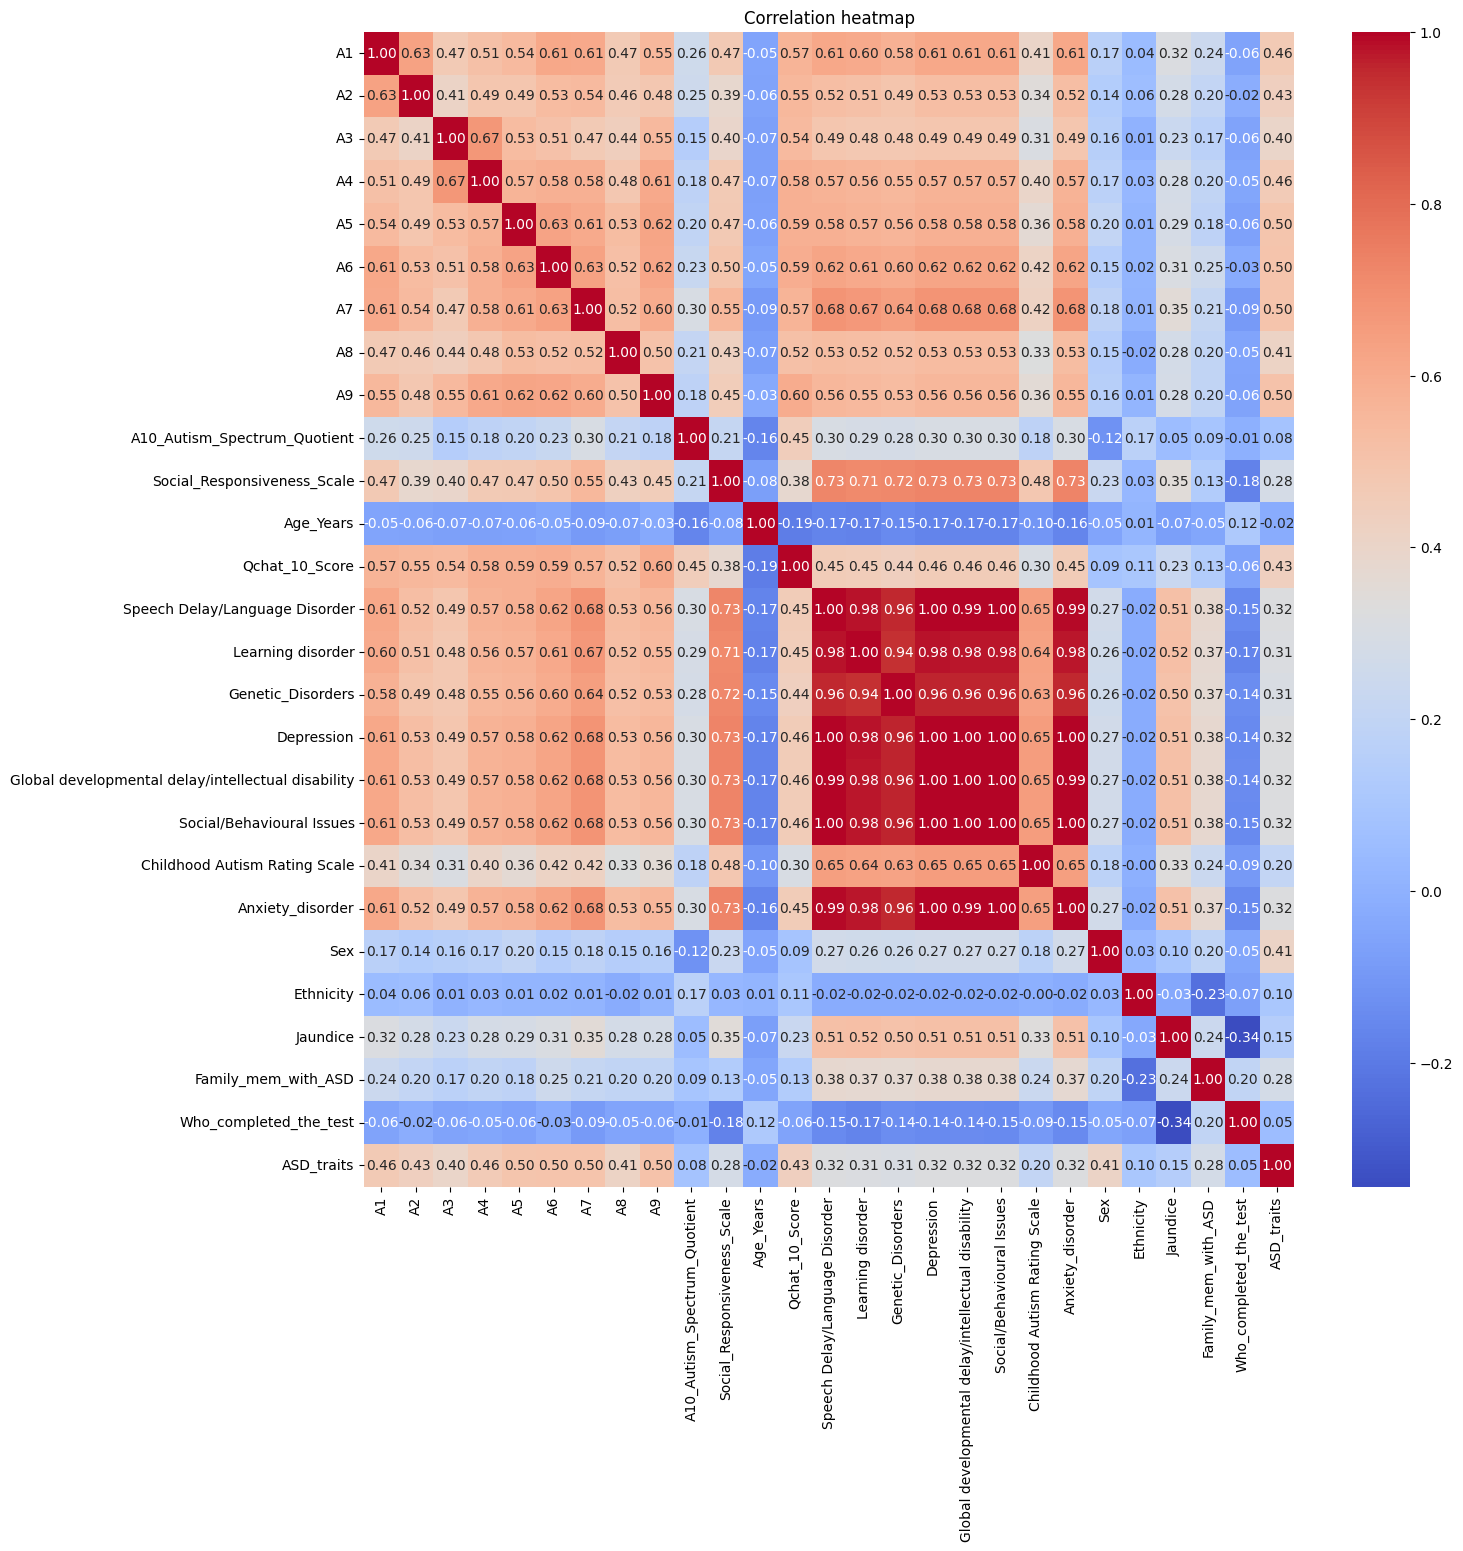

In [177]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

Speech Delay/Language Disorder, Learning Disorder, Genetic Disorders, Depression, and Global developmental delay/intellectual disability exhibits strong positive correlations
The 'Age_Years' variable generally shows weak correlations with most other features.

In [178]:
X = df.drop(columns=[
    "ASD_traits",
    "Qchat_10_Score",
    "Social_Responsiveness_Scale",
    "Childhood Autism Rating Scale",
    "Global developmental delay/intellectual disability",
    "Learning disorder",
    "Genetic_Disorders",
    "Depression"
])

y = df["ASD_traits"]


Data Standardization

In [179]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [180]:
standardized_data = scaler.transform(X)

In [181]:
print(standardized_data)


[[-0.65347602 -0.55931269 -0.52039087 ...  0.54066414 -0.70177005
  -1.34211733]
 [ 1.53027803  1.78790865 -0.52039087 ...  0.54066414 -0.70177005
  -1.34211733]
 [ 1.53027803 -0.55931269 -0.52039087 ...  0.54066414 -0.70177005
  -1.34211733]
 ...
 [-0.65347602 -0.55931269 -0.52039087 ... -1.84957709 -0.70177005
   0.65421306]
 [-0.65347602 -0.55931269 -0.52039087 ... -1.84957709 -0.70177005
   0.65421306]
 [-0.65347602 -0.55931269 -0.52039087 ... -1.84957709 -0.70177005
   0.65421306]]


Train Test Split

In [182]:
X = standardized_data
Y = df['ASD_traits']

In [183]:
print(X)

[[-0.65347602 -0.55931269 -0.52039087 ...  0.54066414 -0.70177005
  -1.34211733]
 [ 1.53027803  1.78790865 -0.52039087 ...  0.54066414 -0.70177005
  -1.34211733]
 [ 1.53027803 -0.55931269 -0.52039087 ...  0.54066414 -0.70177005
  -1.34211733]
 ...
 [-0.65347602 -0.55931269 -0.52039087 ... -1.84957709 -0.70177005
   0.65421306]
 [-0.65347602 -0.55931269 -0.52039087 ... -1.84957709 -0.70177005
   0.65421306]
 [-0.65347602 -0.55931269 -0.52039087 ... -1.84957709 -0.70177005
   0.65421306]]


In [184]:
print(Y)

0       0
1       1
2       1
3       1
4       1
       ..
1980    0
1981    0
1982    1
1983    0
1984    1
Name: ASD_traits, Length: 1985, dtype: int64


In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

SMOTE (Synthetic Minority Oversampling technique)

In [186]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)

In [187]:
print(y_train_smote.shape)

(1718,)


In [188]:
print(y_train_smote.value_counts())

ASD_traits
1    859
0    859
Name: count, dtype: int64


#Training the model

In [189]:
# Step 1: Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Step 2: Perform GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [190]:
# Step 3: Get best model
print("Best RF Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_



Best RF Params: {'max_depth': 7, 'n_estimators': 150}


In [191]:
# Step 4: Make predictions
rf_test_pred = best_rf.predict(X_test)
rf_train_pred = best_rf.predict(X_train_smote)



In [192]:
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(**grid_rf.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())


Cross-validated F1: 0.8962069343712791


In [193]:
# Step 5: Evaluate metrics
rf_accuracy = accuracy_score(Y_test, rf_test_pred)
rf_precision = precision_score(Y_test, rf_test_pred)
rf_recall = recall_score(Y_test, rf_test_pred)
rf_f1 = f1_score(Y_test, rf_test_pred)

print(f"Random Forest - Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest - Precision: {rf_precision:.4f}")
print(f"Random Forest - Recall: {rf_recall:.4f}")
print(f"Random Forest - F1 Score: {rf_f1:.4f}")

Random Forest - Accuracy: 0.9798
Random Forest - Precision: 0.9770
Random Forest - Recall: 0.9860
Random Forest - F1 Score: 0.9815


In [194]:
# Logistic Regression
from imblearn.pipeline import Pipeline
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, scoring='f1')
grid_lr.fit(X_train_smote, y_train_smote)
best_lr = grid_lr.best_estimator_
lr_pred = best_lr.predict(X_test)
# Create a pipeline with SMOTE and the model
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(**grid_lr.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())
print("Logistic Regression:")
print("Accuracy:", accuracy_score(Y_test, lr_pred))
print("Precision:", precision_score(Y_test, lr_pred))
print("Recall:", recall_score(Y_test, lr_pred))
print("F1:", f1_score(Y_test, lr_pred))



Cross-validated F1: 0.8639848733219984
Logistic Regression:
Accuracy: 0.9848866498740554
Precision: 0.995260663507109
Recall: 0.9767441860465116
F1: 0.9859154929577465


In [195]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring='f1')
grid_dt.fit(X_train_smote, y_train_smote)
best_dt = grid_dt.best_estimator_
dt_pred = best_dt.predict(X_test)
# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',DecisionTreeClassifier(**grid_dt.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(Y_test, dt_pred))
print("Precision:", precision_score(Y_test, dt_pred))
print("Recall:", recall_score(Y_test, dt_pred))
print("F1:", f1_score(Y_test, dt_pred))


Cross-validated F1: 0.9168250103913937

Decision Tree:
Accuracy: 0.9420654911838791
Precision: 0.9528301886792453
Recall: 0.9395348837209302
F1: 0.9461358313817331


In [196]:
# Full pipeline: SMOTE + KNN
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter tuning (acts like regularization)
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Apply GridSearch on pipeline
grid_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, Y_train)

# Predict with best estimator
# Added the following line to define best_knn
best_knn = grid_knn.best_estimator_
knn_pred = best_knn.predict(X_test)

# Evaluate
print("\nKNN:")
print("Accuracy:", accuracy_score(Y_test, knn_pred))
print("Precision:", precision_score(Y_test, knn_pred))
print("Recall:", recall_score(Y_test, knn_pred))
print("F1:", f1_score(Y_test, knn_pred))

# Cross-validation F1
cv_scores = cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())



KNN:
Accuracy: 0.9748110831234257
Precision: 0.9951690821256038
Recall: 0.958139534883721
F1: 0.976303317535545
Cross-validated F1: 0.7843171606092769


In [197]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Define pipeline: SMOTE only applies inside the fold during CV
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
])

# Define parameter grid for regularization and kernel selection
param_grid_svm = {
    'svc__C': [0.1, 1, 10],         # regularization strength
    'svc__kernel': ['linear', 'rbf']
}

# Grid search with cross-validation
grid_svm = GridSearchCV(pipeline, param_grid=param_grid_svm, cv=5, scoring='f1')
grid_svm.fit(X_train, Y_train)  # SMOTE will be applied inside the pipeline only to training folds

# Evaluate on test set
best_svm = grid_svm.best_estimator_
svm_pred = best_svm.predict(X_test)

print("\nSVM Performance:")
print("Accuracy:", accuracy_score(Y_test, svm_pred))
print("Precision:", precision_score(Y_test, svm_pred))
print("Recall:", recall_score(Y_test, svm_pred))
print("F1:", f1_score(Y_test, svm_pred))



SVM Performance:
Accuracy: 0.9974811083123426
Precision: 0.9953703703703703
Recall: 1.0
F1: 0.9976798143851509


In [198]:
# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=3, scoring='f1')
grid_xgb.fit(X_train_smote, y_train_smote)
best_xgb = grid_xgb.best_estimator_
xgb_pred = best_xgb.predict(X_test)
# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',XGBClassifier(**grid_xgb.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())

print("\nXGBoost:")
print("Accuracy:", accuracy_score(Y_test, xgb_pred))
print("Precision:", precision_score(Y_test, xgb_pred))
print("Recall:", recall_score(Y_test, xgb_pred))
print("F1:", f1_score(Y_test, xgb_pred))


Cross-validated F1: 0.9580224820071546

XGBoost:
Accuracy: 0.9874055415617129
Precision: 0.981651376146789
Recall: 0.9953488372093023
F1: 0.9884526558891455


In [199]:
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=3)
grid_ada.fit(X_train_smote, y_train_smote)

print("Best AdaBoost Params:", grid_ada.best_params_)
best_ada = grid_ada.best_estimator_

# Predict & Evaluate
y_pred_ada = best_ada.predict(X_test)
ada_accuracy = accuracy_score(Y_test, y_pred_ada)
ada_precision = precision_score(Y_test, y_pred_ada)
ada_recall = recall_score(Y_test, y_pred_ada)
ada_f1 = f1_score(Y_test, y_pred_ada)

# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',AdaBoostClassifier(**grid_ada.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())


print("AdaBoost - Accuracy:", ada_accuracy)
print("AdaBoost - Precision:", ada_precision)
print("AdaBoost - Recall:", ada_recall)
print("AdaBoost - F1 Score:", ada_f1)


Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 150}
Cross-validated F1: 0.8028257000905846
AdaBoost - Accuracy: 0.9672544080604534
AdaBoost - Precision: 0.9675925925925926
AdaBoost - Recall: 0.9720930232558139
AdaBoost - F1 Score: 0.9698375870069605


In [200]:
param_grid_gb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3)
grid_gb.fit(X_train_smote, y_train_smote)

print("Best GradientBoosting Params:", grid_gb.best_params_)
best_gb = grid_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test)

gb_accuracy = accuracy_score(Y_test, y_pred_gb)
gb_precision = precision_score(Y_test, y_pred_gb)
gb_recall = recall_score(Y_test, y_pred_gb)
gb_f1 = f1_score(Y_test, y_pred_gb)

# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',GradientBoostingClassifier(**grid_gb.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())

print("Gradient Boosting - Accuracy:", gb_accuracy)
print("Gradient Boosting - Precision:", gb_precision)
print("Gradient Boosting - Recall:", gb_recall)
print("Gradient Boosting - F1 Score:", gb_f1)


Best GradientBoosting Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Cross-validated F1: 0.9552126298267283
Gradient Boosting - Accuracy: 0.9848866498740554
Gradient Boosting - Precision: 0.9771689497716894
Gradient Boosting - Recall: 0.9953488372093023
Gradient Boosting - F1 Score: 0.9861751152073732


In [201]:
param_grid_lgbm = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_lgbm = GridSearchCV(LGBMClassifier(random_state=42), param_grid_lgbm, cv=3)
grid_lgbm.fit(X_train_smote, y_train_smote)
# Assign the best estimator to best_lgbm
best_lgbm = grid_lgbm.best_estimator_ # This line was missing
y_pred_lgbm = best_lgbm.predict(X_test)
print("Best LightGBM Params:", grid_lgbm.best_params_)

lgbm_accuracy = accuracy_score(Y_test, y_pred_lgbm)
lgbm_precision = precision_score(Y_test, y_pred_lgbm)
lgbm_recall = recall_score(Y_test, y_pred_lgbm)
lgbm_f1 = f1_score(Y_test, y_pred_lgbm)

# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',LGBMClassifier(**grid_lgbm.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())



print("LightGBM - Accuracy:", lgbm_accuracy)
print("LightGBM - Precision:", lgbm_precision)
print("LightGBM - Recall:", lgbm_recall)
print("LightGBM - F1 Score:", lgbm_f1)


[LightGBM] [Info] Number of positive: 572, number of negative: 573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499563 -> initscore=-0.001747
[LightGBM] [Info] Start training from score -0.001747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 572, number of negative: 573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499563 -> initscore=-0.001747
[LightGBM] [Info] Start training from score -0.001747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 573, number of negative: 573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 573, number of negative: 572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500437 -> initscore=0.001747
[LightGBM] [Info] Start training from score 0.001747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 859, number of negative: 859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1718, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 859, number of negative: 859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 1718, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [202]:
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Step 2: Set hyperparameter grid
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5, 7]
}


# Step 3: Grid search with cross-validation
grid_cat = GridSearchCV(catboost, param_grid, cv=3, scoring='accuracy')
grid_cat.fit(X_train_smote, y_train_smote)
# Step 4: Best model from tuning
best_cat = grid_cat.best_estimator_
print("Best CatBoost Parameters:", grid_cat.best_params_)

# Step 5: Predictions
cat_pred = best_cat.predict(X_test)

# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',CatBoostClassifier(**grid_cat.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())


# Step 6: Evaluation
cat_accuracy = accuracy_score(Y_test, cat_pred)
cat_precision = precision_score(Y_test, cat_pred)
cat_recall = recall_score(Y_test, cat_pred)
cat_f1 = f1_score(Y_test, cat_pred)

print(f"CatBoost - Accuracy: {cat_accuracy:.4f}")
print(f"CatBoost - Precision: {cat_precision:.4f}")
print(f"CatBoost - Recall: {cat_recall:.4f}")
print(f"CatBoost - F1 Score: {cat_f1:.4f}")


Best CatBoost Parameters: {'depth': 3, 'iterations': 200, 'learning_rate': 0.1}
0:	learn: 0.5899182	total: 959us	remaining: 191ms
1:	learn: 0.5023823	total: 1.81ms	remaining: 179ms
2:	learn: 0.4507353	total: 2.64ms	remaining: 173ms
3:	learn: 0.4025032	total: 3.5ms	remaining: 172ms
4:	learn: 0.3593913	total: 4.33ms	remaining: 169ms
5:	learn: 0.3263963	total: 5.14ms	remaining: 166ms
6:	learn: 0.2980112	total: 5.95ms	remaining: 164ms
7:	learn: 0.2762882	total: 6.78ms	remaining: 163ms
8:	learn: 0.2526484	total: 7.62ms	remaining: 162ms
9:	learn: 0.2374285	total: 8.43ms	remaining: 160ms
10:	learn: 0.2277842	total: 9.23ms	remaining: 159ms
11:	learn: 0.2177845	total: 10.1ms	remaining: 158ms
12:	learn: 0.2065003	total: 10.9ms	remaining: 157ms
13:	learn: 0.2002771	total: 12.8ms	remaining: 170ms
14:	learn: 0.1934534	total: 13.7ms	remaining: 169ms
15:	learn: 0.1801440	total: 14.6ms	remaining: 167ms
16:	learn: 0.1759636	total: 15.4ms	remaining: 165ms
17:	learn: 0.1703245	total: 16.2ms	remaining: 16

In [203]:
# Bagging
param_grid_bag = {
    'n_estimators': [10, 50],
    'max_samples': [0.5, 1.0]
}
grid_bag = GridSearchCV(BaggingClassifier(), param_grid_bag, cv=3, scoring='f1')
grid_bag.fit(X_train_smote, y_train_smote)
best_bag = grid_bag.best_estimator_
bag_pred = best_bag.predict(X_test)

# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',BaggingClassifier(**grid_bag.best_params_, random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())


print("\nBagging:")
print("Accuracy:", accuracy_score(Y_test, bag_pred))
print("Precision:", precision_score(Y_test, bag_pred))
print("Recall:", recall_score(Y_test, bag_pred))
print("F1:", f1_score(Y_test, bag_pred))



Cross-validated F1: 0.9360769547227271

Bagging:
Accuracy: 0.9773299748110831
Precision: 0.9768518518518519
Recall: 0.9813953488372092
F1: 0.9791183294663574


In [204]:
# Voting (No tuning usually needed)
voting = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('dt', best_dt),
        ('xgb', best_xgb)
    ],
    voting='soft'
)
voting.fit(X_train_smote, y_train_smote)
voting_pred = voting.predict(X_test)

# Create a pipeline with SMOTE and the model
# Removed the grid_voting.best_params since VotingClassifier is not being tuned.
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',VotingClassifier(estimators=[
        ('lr', best_lr),
        ('dt', best_dt),
        ('xgb', best_xgb)
    ],
    voting='soft')) # Removed random_state=42 from VotingClassifier
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())


print("\nVoting:")
print("Accuracy:", accuracy_score(Y_test, voting_pred))
print("Precision:", precision_score(Y_test, voting_pred))
print("Recall:", recall_score(Y_test, voting_pred))
print("F1:", f1_score(Y_test, voting_pred))


Cross-validated F1: 0.9609343811619105

Voting:
Accuracy: 0.982367758186398
Precision: 0.9770642201834863
Recall: 0.9906976744186047
F1: 0.9838337182448037


In [205]:
# Stacking
stacking = StackingClassifier(
    estimators=[
        ('lr', best_lr),
        ('dt', best_dt),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression()
)
stacking.fit(X_train_smote, y_train_smote)
stacking_pred = stacking.predict(X_test)

# Create a pipeline with SMOTE and the model
# Since you are not tuning StackingClassifier, you don't need grid_stacking
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking)  # Directly use the stacking classifier you defined earlier
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Cross-validated F1:", cv_scores.mean())


print("\nStacking:")
print("Accuracy:", accuracy_score(Y_test, stacking_pred))
print("Precision:", precision_score(Y_test, stacking_pred))
print("Recall:", recall_score(Y_test, stacking_pred))
print("F1:", f1_score(Y_test, stacking_pred))


Cross-validated F1: 0.9451703806993436

Stacking:
Accuracy: 0.9899244332493703
Precision: 0.9861751152073732
Recall: 0.9953488372093023
F1: 0.9907407407407407


In [206]:
# Dictionary to store results
model_metrics = {}


model_name = 'Random Forest'
y_pred = best_rf.predict(X_test)

model_metrics[model_name] = {
    'Accuracy': accuracy_score(Y_test, y_pred),
    'Precision': precision_score(Y_test, y_pred),
    'Recall': recall_score(Y_test, y_pred),
    'F1-Score': f1_score(Y_test, y_pred)
}


# SVM
svm_pred = best_svm.predict(X_test)
model_metrics['SVM'] = {
    'Accuracy': accuracy_score(Y_test, svm_pred),
    'Precision': precision_score(Y_test, svm_pred),
    'Recall': recall_score(Y_test, svm_pred),
    'F1-Score': f1_score(Y_test, svm_pred)
}

 # KNN
knn_pred = best_knn.predict(X_test)
model_metrics['KNN'] = {
    'Accuracy': accuracy_score(Y_test, knn_pred),
    'Precision': precision_score(Y_test, knn_pred),
    'Recall': recall_score(Y_test, knn_pred),
    'F1-Score': f1_score(Y_test, knn_pred)
}


#DT
dt_pred = best_dt.predict(X_test)

model_metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(Y_test, dt_pred),
    'Precision': precision_score(Y_test, dt_pred),
    'Recall': recall_score(Y_test, dt_pred),
    'F1-Score': f1_score(Y_test, dt_pred)
}

# lr
lr_pred = best_lr.predict(X_test)

model_metrics['Logistic Regression']  = {
    'Accuracy': accuracy_score(Y_test, lr_pred),
    'Precision': precision_score(Y_test, lr_pred),
    'Recall': recall_score(Y_test, lr_pred),
    'F1-Score': f1_score(Y_test, lr_pred)
}


# XGBoost
xgb_pred = best_xgb.predict(X_test)
model_metrics['XGBoost'] = {
    'Accuracy': accuracy_score(Y_test, xgb_pred),
    'Precision': precision_score(Y_test, xgb_pred),
    'Recall': recall_score(Y_test, xgb_pred),
    'F1-Score': f1_score(Y_test, xgb_pred)
}

# AdaBoost
ada_pred = best_ada.predict(X_test)
model_metrics['AdaBoost'] = {
    'Accuracy': accuracy_score(Y_test, ada_pred),
    'Precision': precision_score(Y_test, ada_pred),
    'Recall': recall_score(Y_test, ada_pred),
    'F1-Score': f1_score(Y_test, ada_pred)
}

# Gradient Boosting
gb_pred = best_gb.predict(X_test)
model_metrics['GradientBoosting'] = {
    'Accuracy': accuracy_score(Y_test, gb_pred),
    'Precision': precision_score(Y_test, gb_pred),
    'Recall': recall_score(Y_test, gb_pred),
    'F1-Score': f1_score(Y_test, gb_pred)
}

# LightGBM
lgbm_pred = best_lgbm.predict(X_test)
model_metrics['LightGBM'] = {
    'Accuracy': accuracy_score(Y_test, lgbm_pred),
    'Precision': precision_score(Y_test, lgbm_pred),
    'Recall': recall_score(Y_test, lgbm_pred),
    'F1-Score': f1_score(Y_test, lgbm_pred)
}

# CatBoost
cat_pred = best_cat.predict(X_test)
model_metrics['CatBoost'] = {
    'Accuracy': accuracy_score(Y_test, cat_pred),
    'Precision': precision_score(Y_test, cat_pred),
    'Recall': recall_score(Y_test, cat_pred),
    'F1-Score': f1_score(Y_test, cat_pred)
}



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [207]:


# Voting
model_metrics['Voting'] = {
    'Accuracy': accuracy_score(Y_test, voting_pred),
    'Precision': precision_score(Y_test, voting_pred),
    'Recall': recall_score(Y_test, voting_pred),
    'F1-Score': f1_score(Y_test, voting_pred)
}

# Bagging
model_metrics['Bagging'] = {
    'Accuracy': accuracy_score(Y_test, bag_pred),
    'Precision': precision_score(Y_test, bag_pred),
    'Recall': recall_score(Y_test, bag_pred),
    'F1-Score': f1_score(Y_test, bag_pred)
}

# Stacking
model_metrics['Stacking'] = {
    'Accuracy': accuracy_score(Y_test, stacking_pred),
    'Precision': precision_score(Y_test, stacking_pred),
    'Recall': recall_score(Y_test, stacking_pred),
    'F1-Score': f1_score(Y_test, stacking_pred)
}


                     Accuracy  Precision    Recall  F1-Score
SVM                  0.997481   0.995370  1.000000  0.997680
CatBoost             0.997481   0.995370  1.000000  0.997680
LightGBM             0.989924   0.986175  0.995349  0.990741
Stacking             0.989924   0.986175  0.995349  0.990741
XGBoost              0.987406   0.981651  0.995349  0.988453
GradientBoosting     0.984887   0.977169  0.995349  0.986175
Logistic Regression  0.984887   0.995261  0.976744  0.985915
Voting               0.982368   0.977064  0.990698  0.983834
Random Forest        0.979849   0.976959  0.986047  0.981481
Bagging              0.977330   0.976852  0.981395  0.979118
KNN                  0.974811   0.995169  0.958140  0.976303
AdaBoost             0.967254   0.967593  0.972093  0.969838
Decision Tree        0.942065   0.952830  0.939535  0.946136


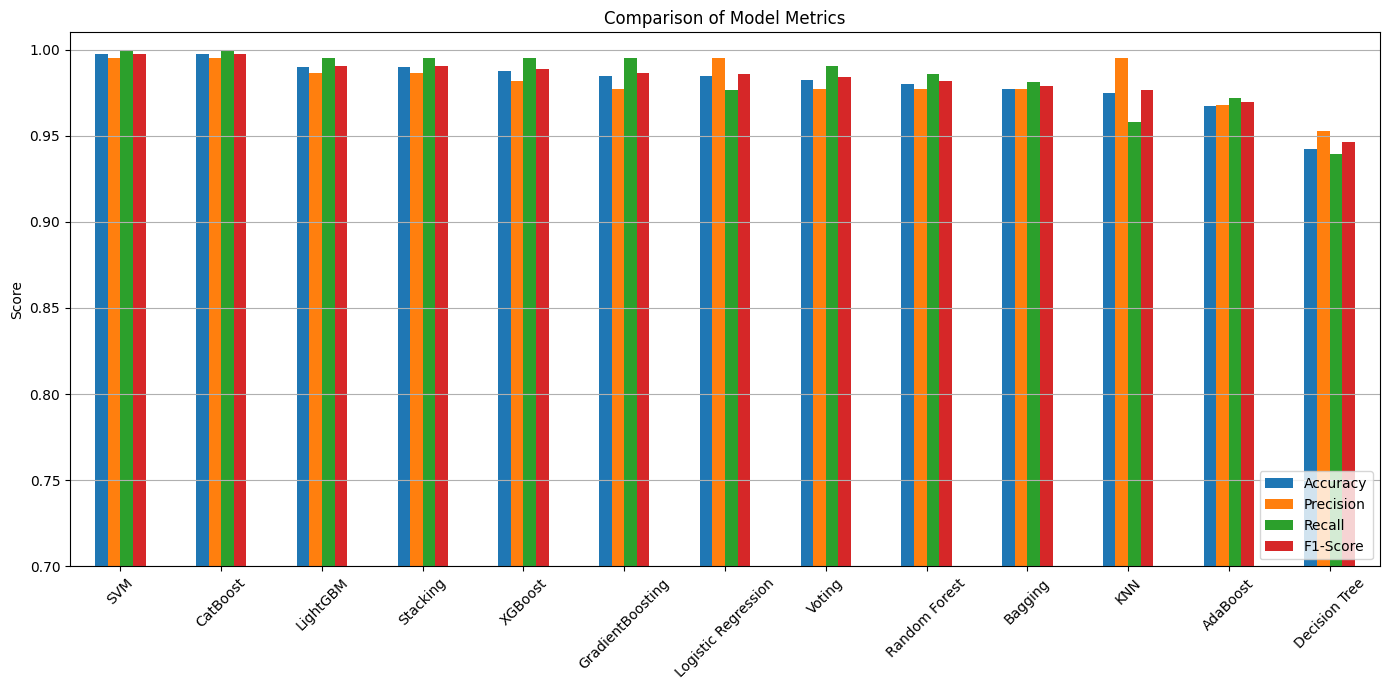

In [208]:
# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics).T
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

# Show table
print(metrics_df)

# Plot
metrics_df.plot(kind='bar', figsize=(14, 7))
plt.title("Comparison of Model Metrics")
plt.ylabel("Score")
plt.ylim(0.7, 1.01)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Most models performed very well across all four evaluation metrics (Accuracy, Precision, Recall, F1-score), especially the ensemble and boosting methods.
However, based on the chart:

Stacking, XGBoost, and CatBoost showed the best overall performance, achieving almost perfect scores across all metrics.
 Traditional models like KNN and Logistic Regression performed slightly lower, especially in recall and F1-score.
 Stacking had the most consistent and highest scores overall

